In [1]:
import torch
import matplotlib.pyplot as plt
import random

In [2]:
def pixel_mix(source, target, alpha=0.9):
    # Get the dimensions of the images
    batch_size, _, height, width = target.size()

    # Create an empty tensor for mixed images
    mixed_images = torch.empty_like(target)

    for i in range(batch_size):
        for h in range(height):
            for w in range(width):
                # Randomly choose between source and target pixels
                if random.random() < alpha:
                    mixed_images[i, :, h, w] = source[i, :, h, w]
                else:
                    mixed_images[i, :, h, w] = target[i, :, h, w]

    return mixed_images

In [3]:
from torchvision import transforms
from PIL import Image

In [4]:
def load_image(image_path, size=(128, 128)):
    image = Image.open(image_path).convert('RGB')  # Ensure image is in RGB mode
    image = image.resize(size, Image.BILINEAR)    # Resize the image
    transform = transforms.ToTensor()               # Convert image to tensor
    return transform(image).unsqueeze(0)           # Add batch dimension

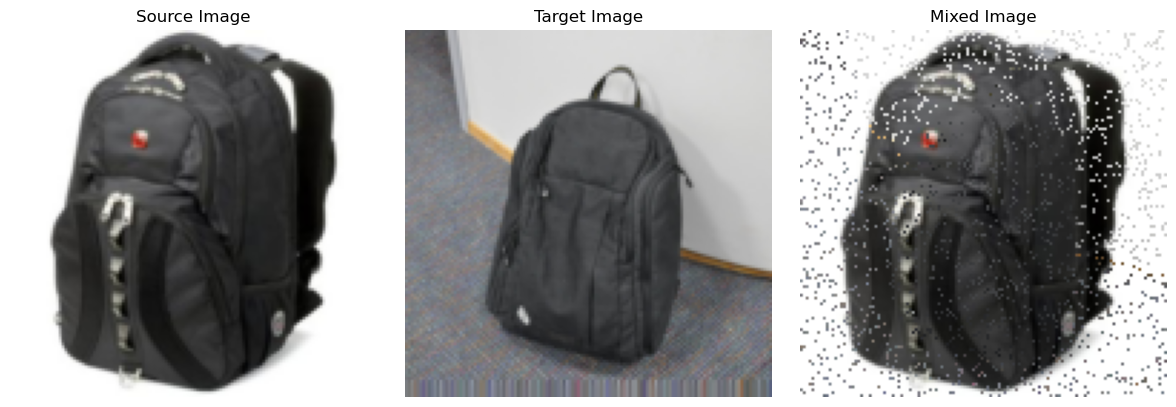

In [5]:
batch_size = 1
channels = 3
height = 128
width = 128

source = load_image('/home/crueang/Chaks/AIOT_project/data/Office-31/amazon/back_pack/frame_0002.jpg')
target = load_image('/home/crueang/Chaks/AIOT_project/data/Office-31/dslr/back_pack/frame_0002.jpg')

# Generate mixed images
mixed_images = pixel_mix(source, target)

# Plotting the images
fig, axes = plt.subplots(nrows=batch_size, ncols=3, figsize=(12, 4 * batch_size))

axes[0].imshow(source.squeeze(0).permute(1, 2, 0).cpu().numpy())
axes[0].set_title('Source Image')
axes[0].axis('off')

axes[1].imshow(target.squeeze(0).permute(1, 2, 0).cpu().numpy())
axes[1].set_title('Target Image')
axes[1].axis('off')

axes[2].imshow(mixed_images.squeeze(0).permute(1, 2, 0).cpu().numpy())
axes[2].set_title('Mixed Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()